In [398]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/DHRUVIL/OneDrive/Stratsntools/Python Directory')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)
from collections import Counter
import sklearn
import re
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import math

df_train=pd.read_csv('bf_train.csv')
df_test=pd.read_csv('bf_test.csv')

In [399]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [383]:
resrve_train=df_train
reserve_test=df_test

In [349]:
df_train.shape

(550068, 12)

In [324]:
df_train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

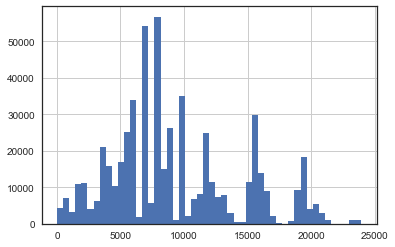

In [463]:
df_train['Purchase'].hist(bins=50)
#Purchases are rather discrete

In [464]:
df_train.shape[0]/len(df_train['Purchase'].value_counts())
#On an average 30 rows could have the same purchase

30.382104391052195

In [377]:
pd.DataFrame(df_train['Product_ID'].value_counts()).head()

,Product_ID
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470


In [378]:
temp=df_train[df_train['Product_ID']=='P00265242']
temp.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,NaN,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,NaN,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,NaN,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,NaN,8593


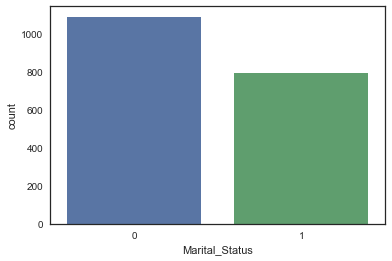

In [379]:
sns.countplot(temp['Marital_Status'])

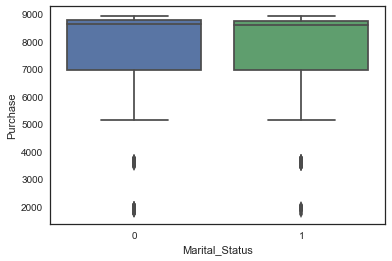

In [380]:
sns.boxplot(x='Marital_Status',y='Purchase',data=temp)

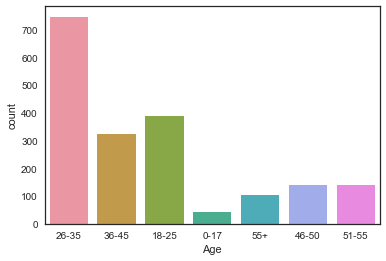

In [381]:
sns.countplot(temp['Age'])

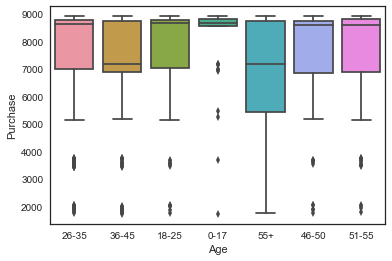

In [382]:
sns.boxplot(x='Age',y='Purchase',data=temp)

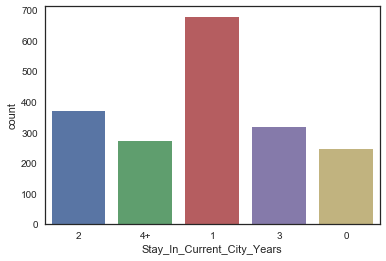

In [383]:
sns.countplot(temp['Stay_In_Current_City_Years'])

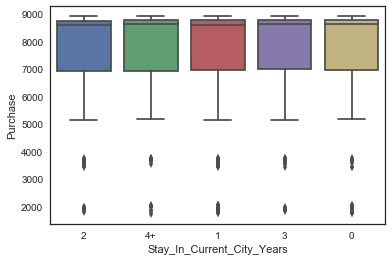

In [384]:
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=temp)

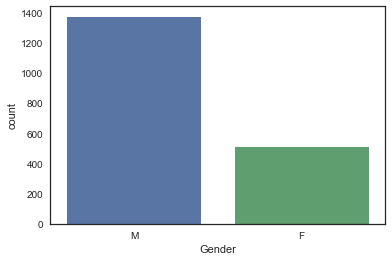

In [385]:
sns.countplot(temp['Gender'])

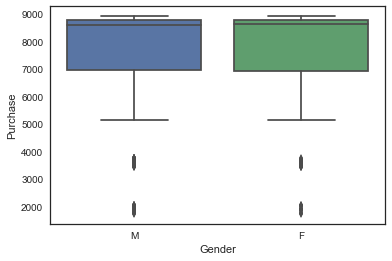

In [386]:
sns.boxplot(x='Gender',y='Purchase',data=temp)

In [387]:
df_train[df_train['User_ID']==1000014].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
55,1000014,P00276642,M,36-45,0,C,0,0,8,11.0,NaN,5848
39233,1000014,P00265242,M,36-45,0,C,0,0,5,8.0,NaN,5360
39234,1000014,P00274942,M,36-45,0,C,0,0,8,NaN,NaN,4188
39235,1000014,P00220442,M,36-45,0,C,0,0,5,14.0,NaN,6886
78198,1000014,P00262242,M,36-45,0,C,0,0,1,11.0,16.0,7646


In [400]:
user_wise_purchase_count_train=Counter(df_train['User_ID'])
df_train['User_count']=df_train['User_ID'].apply(lambda x: user_wise_purchase_count_train[x])

user_wise_purchase_count_test=Counter(df_test['User_ID'])
df_test['User_count']=df_test['User_ID'].apply(lambda x: user_wise_purchase_count_test[x])

In [402]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_count
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,35
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,35
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,35
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,35
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,77


## -------------------------------------------------------------------------------------------------------------------------------

### Filling NA

In [403]:
df_train=df_train.fillna(0)
df_test=df_test.fillna(0)
df_train_2=df_train.copy()
df_test_2=df_test.copy()

### Astyping

In [404]:
df_train['Product_Category_1']=df_train['Product_Category_1'].astype('int')
df_train['Product_Category_2']=df_train['Product_Category_2'].astype('int')
df_train['Product_Category_3']=df_train['Product_Category_3'].astype('int')

### One hot features

In [405]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [406]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(df_train_2['Product_Category_1'])
q=lb.transform(df_train_2['Product_Category_1'])
#pca.fit(q)
#q=pca.transform(q)
df_train_2=pd.concat([df_train_2,pd.DataFrame(q)],axis=1)

In [407]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(df_train_2['Product_Category_2'])
q=lb.transform(df_train_2['Product_Category_2'])
#pca.fit(q)
#q=pca.transform(q)
df_train_2=pd.concat([df_train_2,pd.DataFrame(q)],axis=1)

In [408]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(df_train_2['Product_Category_3'])
q=lb.transform(df_train_2['Product_Category_3'])
#pca.fit(q)
#q=pca.transform(q)
df_train_2=pd.concat([df_train_2,pd.DataFrame(q)],axis=1)

In [409]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(df_train['Product_Category_1'])
q=lb.transform(df_test_2['Product_Category_1'])
#pca.fit(q)
#q=pca.transform(q)
df_test_2=pd.concat([df_test_2,pd.DataFrame(q)],axis=1)

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(df_train['Product_Category_2'])
q=lb.transform(df_test_2['Product_Category_2'])
#pca.fit(q)
#q=pca.transform(q)
df_test_2=pd.concat([df_test_2,pd.DataFrame(q)],axis=1)

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(df_train['Product_Category_3'])
q=lb.transform(df_test_2['Product_Category_3'])
#pca.fit(q)
#q=pca.transform(q)
df_test_2=pd.concat([df_test_2,pd.DataFrame(q)],axis=1)

In [410]:
df_train.shape

(550068, 13)

In [411]:
df_train_2.shape

(550068, 67)

In [412]:
df_test.shape

(233599, 12)

In [413]:
df_test_2.shape

(233599, 66)

### Encoding

In [414]:
df_train=df_train.fillna(0)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df_train['Gender'])
df_train['Gender']=le.transform(df_train['Gender'])

le.fit(df_train['Age'])
df_train['Age']=le.transform(df_train['Age'])

le.fit(df_train['Occupation'])
df_train['Occupation']=le.transform(df_train['Occupation'])

le.fit(df_train['Stay_In_Current_City_Years'])
df_train['Stay_In_Current_City_Years']=le.transform(df_train['Stay_In_Current_City_Years'])

le.fit(df_train['Marital_Status'])
df_train['Marital_Status']=le.transform(df_train['Marital_Status'])

le.fit(df_train['City_Category'])
df_train['City_Category']=le.transform(df_train['City_Category'])

le.fit(df_train['Product_Category_2'])
df_train['Product_Category_2']=le.transform(df_train['Product_Category_2'])

le.fit(df_train['Product_Category_1'])
df_train['Product_Category_1']=le.transform(df_train['Product_Category_1'])

le.fit(df_train['Product_Category_3'])
df_train['Product_Category_3']=le.transform(df_train['Product_Category_3'])

In [415]:
df_test=df_test.fillna(0)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df_test['Gender'])
df_test['Gender']=le.transform(df_test['Gender'])

le.fit(df_test['Age'])
df_test['Age']=le.transform(df_test['Age'])

le.fit(df_test['Occupation'])
df_test['Occupation']=le.transform(df_test['Occupation'])

le.fit(df_test['Stay_In_Current_City_Years'])
df_test['Stay_In_Current_City_Years']=le.transform(df_test['Stay_In_Current_City_Years'])

le.fit(df_test['Marital_Status'])
df_test['Marital_Status']=le.transform(df_test['Marital_Status'])

le.fit(df_test['City_Category'])
df_test['City_Category']=le.transform(df_test['City_Category'])

le.fit(df_test['Product_Category_2'])
df_test['Product_Category_2']=le.transform(df_test['Product_Category_2'])

le.fit(df_test['Product_Category_1'])
df_test['Product_Category_1']=le.transform(df_test['Product_Category_1'])

le.fit(df_test['Product_Category_3'])
df_test['Product_Category_3']=le.transform(df_test['Product_Category_3'])

In [505]:
df_train['User_count']=df_train['User_count']*df_train['User_count']
df_test['User_count']=df_test['User_count']*df_test['User_count']

In [418]:
list(df_train)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase',
 'User_count']

In [561]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeRegressor
prod_dict=Counter(df_train['Product_ID'])
model_pid_gb1={}
model_pid_gb2={}
model_pid_lin={}
c=0
for i in prod_dict.keys():
    print(c*100/len(prod_dict.keys()))
    c+=1
    temp=df_train[df_train['Product_ID']==i]
    temp=temp.loc[:,['Gender',
 'Age',
 'Occupation',
 'City_Category','User_count',
 'Stay_In_Current_City_Years',
 'Marital_Status','Purchase']]
    X=temp.loc[:,temp.columns!='Purchase']
    y=temp['Purchase']
    model1=GradientBoostingRegressor(n_estimators=20,criterion='mse')
    model3=GradientBoostingRegressor(n_estimators=15,criterion='mse')
    model3.fit(X,y)
    model1.fit(X,y)
    model2=LinearRegression()
    model2.fit(X,y)
    model_pid_gb1[i]=model1
    model_pid_gb2[i]=model3
    model_pid_lin[i]=model2
    df_train.loc[df_train['Product_ID']==i,'Purchase_gbm']=model1.predict(X)
    df_train.loc[df_train['Product_ID']==i,'Purchase_gbm2']=model3.predict(X)
    df_train.loc[df_train['Product_ID']==i,'Purchase_lin']=model2.predict(X)

0.0
0.027540622418066648
0.055081244836133296
0.08262186725419994
0.11016248967226659
0.13770311209033323
0.16524373450839988
0.19278435692646653
0.22032497934453318
0.24786560176259984
0.27540622418066646
0.3029468465987331
0.33048746901679976
0.3580280914348664
0.38556871385293306
0.4131093362709997
0.44064995868906637
0.468190581107133
0.49573120352519967
0.5232718259432663
0.5508124483613329
0.5783530707793996
0.6058936931974662
0.6334343156155329
0.6609749380335995
0.6885155604516662
0.7160561828697328
0.7435968052877995
0.7711374277058661
0.7986780501239328
0.8262186725419994
0.8537592949600661
0.8812999173781327
0.9088405397961994
0.936381162214266
0.9639217846323327
0.9914624070503993
1.019003029468466
1.0465436518865325
1.0740842743045993
1.1016248967226658
1.1291655191407326
1.1567061415587991
1.184246763976866
1.2117873863949324
1.2393280088129992
1.2668686312310657
1.2944092536491325
1.321949876067199
1.3494904984852658
1.3770311209033324
1.4045717433213991
1.43211236573946

12.310658220875792
12.338198843293858
12.365739465711926
12.393280088129991
12.420820710548059
12.448361332966124
12.475901955384192
12.503442577802259
12.530983200220325
12.558523822638392
12.586064445056458
12.613605067474525
12.641145689892591
12.668686312310658
12.696226934728724
12.723767557146791
12.751308179564859
12.778848801982924
12.806389424400992
12.833930046819058
12.861470669237125
12.88901129165519
12.916551914073258
12.944092536491326
12.971633158909391
12.999173781327459
13.026714403745524
13.054255026163592
13.081795648581657
13.109336270999725
13.13687689341779
13.164417515835858
13.191958138253925
13.219498760671991
13.247039383090058
13.274580005508124
13.302120627926191
13.329661250344257
13.357201872762325
13.384742495180392
13.412283117598458
13.439823740016525
13.46736436243459
13.494904984852658
13.522445607270724
13.549986229688791
13.577526852106857
13.605067474524924
13.632608096942992
13.660148719361057
13.687689341779125
13.71522996419719
13.7427705866152

24.40099146240705
24.428532084825118
24.456072707243184
24.48361332966125
24.51115395207932
24.538694574497384
24.56623519691545
24.593775819333516
24.621316441751585
24.64885706416965
24.676397686587716
24.703938309005782
24.73147893142385
24.759019553841917
24.786560176259982
24.81410079867805
24.841641421096117
24.869182043514183
24.89672266593225
24.924263288350318
24.951803910768383
24.97934453318645
25.006885155604518
25.034425778022584
25.06196640044065
25.089507022858715
25.117047645276784
25.14458826769485
25.172128890112916
25.199669512530985
25.22721013494905
25.254750757367116
25.282291379785182
25.30983200220325
25.337372624621317
25.364913247039382
25.392453869457448
25.419994491875517
25.447535114293583
25.47507573671165
25.502616359129718
25.530156981547783
25.55769760396585
25.585238226383915
25.612778848801984
25.64031947122005
25.667860093638115
25.695400716056184
25.72294133847425
25.750481960892316
25.77802258331038
25.80556320572845
25.833103828146516
25.860644450

36.60148719361057
36.62902781602864
36.65656843844671
36.68410906086478
36.71164968328284
36.73919030570091
36.766730928118974
36.79427155053704
36.821812172955106
36.84935279537318
36.876893417791244
36.90443404020931
36.931974662627375
36.95951528504544
36.98705590746351
37.01459652988157
37.042137152299645
37.06967777471771
37.09721839713578
37.12475901955384
37.15229964197191
37.17984026438997
37.20738088680804
37.23492150922611
37.26246213164418
37.29000275406224
37.31754337648031
37.345083998898374
37.37262462131644
37.400165243734506
37.42770586615258
37.455246488570644
37.48278711098871
37.510327733406776
37.53786835582484
37.56540897824291
37.59294960066097
37.62049022307904
37.64803084549711
37.67557146791518
37.70311209033324
37.73065271275131
37.75819333516937
37.78573395758744
37.813274580005505
37.84081520242358
37.86835582484164
37.89589644725971
37.923437069677775
37.95097769209584
37.978518314513906
38.00605893693197
38.033599559350044
38.06114018176811
38.088680804186

49.02230790415864
49.0498485265767
49.07738914899477
49.104929771412834
49.1324703938309
49.160011016248966
49.18755163866703
49.215092261085104
49.24263288350317
49.270173505921235
49.2977141283393
49.32525475075737
49.35279537317543
49.3803359955935
49.407876618011564
49.435417240429636
49.4629578628477
49.49049848526577
49.51803910768383
49.5455797301019
49.573120352519965
49.60066097493803
49.6282015973561
49.65574221977417
49.683282842192234
49.7108234646103
49.738364087028366
49.76590470944643
49.7934453318645
49.82098595428257
49.848526576700635
49.8760671991187
49.90360782153677
49.93114844395483
49.9586890663729
49.986229688790964
50.013770311209036
50.0413109336271
50.06885155604517
50.09639217846323
50.1239328008813
50.151473423299365
50.17901404571743
50.2065546681355
50.23409529055357
50.261635912971634
50.2891765353897
50.316717157807766
50.34425778022583
50.3717984026439
50.39933902506197
50.426879647480035
50.4544202698981
50.48196089231617
50.50950151473423
50.53704213

61.47066923712476
61.498209859542825
61.52575048196089
61.55329110437896
61.58083172679702
61.608372349215095
61.63591297163316
61.66345359405123
61.69099421646929
61.71853483888736
61.74607546130542
61.77361608372349
61.80115670614156
61.82869732855963
61.85623795097769
61.88377857339576
61.911319195813824
61.93885981823189
61.966400440649956
61.99394106306803
62.021481685486094
62.04902230790416
62.076562930322225
62.10410355274029
62.13164417515836
62.15918479757642
62.186725419994495
62.21426604241256
62.24180666483063
62.26934728724869
62.29688790966676
62.32442853208482
62.35196915450289
62.37950977692096
62.40705039933903
62.43459102175709
62.46213164417516
62.489672266593224
62.51721288901129
62.544753511429356
62.57229413384742
62.599834756265494
62.62737537868356
62.654916001101626
62.68245662351969
62.70999724593776
62.73753786835582
62.76507849077389
62.79261911319196
62.82015973561003
62.84770035802809
62.87524098044616
62.90278160286422
62.93032222528229
62.95786284770035

74.00165243734509
74.02919305976314
74.05673368218122
74.08427430459929
74.11181492701735
74.13935554943542
74.16689617185348
74.19443679427155
74.22197741668961
74.24951803910768
74.27705866152576
74.30459928394382
74.33213990636189
74.35968052877995
74.38722115119802
74.41476177361608
74.44230239603415
74.46984301845222
74.49738364087028
74.52492426328836
74.55246488570641
74.58000550812449
74.60754613054254
74.63508675296062
74.66262737537869
74.69016799779675
74.71770862021482
74.74524924263288
74.77278986505095
74.80033048746901
74.82787110988708
74.85541173230516
74.88295235472322
74.91049297714129
74.93803359955935
74.96557422197742
74.99311484439548
75.02065546681355
75.04819608923161
75.07573671164968
75.10327733406776
75.13081795648581
75.15835857890389
75.18589920132194
75.21343982374002
75.24098044615808
75.26852106857615
75.29606169099422
75.32360231341228
75.35114293583035
75.37868355824841
75.40622418066648
75.43376480308454
75.46130542550262
75.48884604792069
75.5163866

86.58771688240154
86.61525750481961
86.64279812723768
86.67033874965574
86.69787937207381
86.72541999449187
86.75296061690995
86.780501239328
86.80804186174608
86.83558248416414
86.86312310658221
86.89066372900028
86.91820435141834
86.94574497383641
86.97328559625447
87.00082621867254
87.0283668410906
87.05590746350867
87.08344808592675
87.1109887083448
87.13852933076288
87.16606995318094
87.19361057559901
87.22115119801707
87.24869182043514
87.27623244285321
87.30377306527127
87.33131368768935
87.3588543101074
87.38639493252548
87.41393555494354
87.44147617736161
87.46901679977968
87.49655742219774
87.52409804461581
87.55163866703387
87.57917928945194
87.60671991187
87.63426053428807
87.66180115670615
87.6893417791242
87.71688240154228
87.74442302396034
87.77196364637841
87.79950426879647
87.82704489121454
87.85458551363261
87.88212613605067
87.90966675846875
87.9372073808868
87.96474800330488
87.99228862572294
88.01982924814101
88.04736987055908
88.07491049297714
88.10245111539521
88

99.3390250619664
99.36656568438447
99.39410630680253
99.4216469292206
99.44918755163867
99.47672817405673
99.5042687964748
99.53180941889286
99.55935004131094
99.586890663729
99.61443128614707
99.64197190856514
99.6695125309832
99.69705315340127
99.72459377581933
99.7521343982374
99.77967502065546
99.80721564307353
99.8347562654916
99.86229688790966
99.88983751032774
99.9173781327458
99.94491875516387
99.97245937758193


In [276]:
df_train['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00270942    1152
             ... 
P00291642       1
P00338242       1
P00013842       1
P00069642       1
P00208642       1
P00070142       1
P00077542       1
P00215142       1
P00072142       1
P00203242       1
P00053242       1
P00012342       1
P00241842       1
P00211742       1
P00143442       1
P00335642       1
P00126342       1
P00064542       1
P00012942       1
P00068742       1
P00062442       1
P00106342       1
P00060742       1
P00091742       1
P00143242 

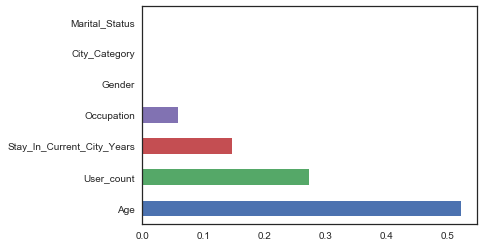

In [430]:
importances = model_pid['P00265242'].feature_importances_

(pd.Series(importances, index=X.columns)
   .nlargest(20)
   .plot(kind='barh')) 

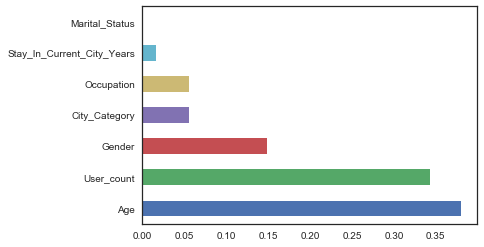

In [431]:
importances = model_pid['P00025442'].feature_importances_

(pd.Series(importances, index=X.columns)
   .nlargest(20)
   .plot(kind='barh')) 

In [562]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeRegressor
df_test['Purchase_gbm1']=np.mean(df_train['Purchase'])
df_test['Purchase_lin']=np.mean(df_train['Purchase'])
df_test['Purchase_gbm2']=np.mean(df_train['Purchase'])

prod_dict=Counter(df_test['Product_ID'])
for i in prod_dict.keys():
    temp=df_test[df_test['Product_ID']==i]
    temp=temp.loc[:,['Gender',
 'Age',
 'Occupation',
 'City_Category','User_count',
 'Stay_In_Current_City_Years',
 'Marital_Status']]
    try:
        predictions_gb1=model_pid_gb1[i].predict(temp)
        predictions_gb2=model_pid_gb2[i].predict(temp)
        predictions_lin=model_pid_lin[i].predict(temp)
        print(len(predictions_lin))
        df_test.loc[df_test['Product_ID']==i,'Purchase_gbm1']=predictions_gb1
        df_test.loc[df_test['Product_ID']==i,'Purchase_gbm2']=predictions_gb2
        df_test.loc[df_test['Product_ID']==i,'Purchase_lin']=predictions_lin
    except:
        pass

397
117
75
8
214
118
178
68
42
152
646
49
176
129
201
212
101
135
829
78
277
153
267
103
46
58
553
100
129
124
166
90
199
87
54
309
484
396
369
231
139
717
57
232
288
222
551
99
299
164
151
98
248
288
113
71
183
258
173
68
397
86
113
158
58
183
190
161
196
267
112
554
293
261
58
58
94
99
304
197
193
17
78
238
73
212
259
44
86
626
246
30
124
233
390
73
12
114
187
109
8
102
107
87
306
36
103
212
117
201
36
8
146
389
112
123
47
59
127
292
138
231
312
34
65
126
246
22
183
167
478
158
117
32
40
148
37
81
112
175
108
228
197
21
585
101
462
12
126
217
291
152
151
272
210
279
271
263
144
194
34
202
94
680
350
74
162
99
100
267
166
297
260
248
384
213
14
112
390
152
32
406
155
68
191
257
171
38
178
96
22
184
134
157
245
621
101
129
543
53
133
592
103
68
294
117
53
170
331
232
211
51
40
119
85
217
18
226
375
605
42
154
545
250
384
15
44
164
155
144
160
238
55
29
98
19
285
110
280
182
58
69
23
307
128
178
424
118
130
11
82
256
559
89
89
290
380
67
71
415
282
218
99
150
213
277
80
204
165
13
47
10

41
29
26
21
7
14
13
12
14
29
12
22
15
31
68
4
14
2
35
8
3
11
58
24
12
5
2
3
20
3
30
27
12
8
13
21
9
30
4
11
49
6
28
8
6
41
7
5
66
26
42
19
20
33
7
14
2
9
25
8
20
13
29
9
30
37
17
51
43
14
8
5
23
4
9
6
23
29
20
8
17
16
27
21
8
11
11
34
6
7
22
11
11
14
18
15
13
31
2
25
44
20
41
6
20
3
17
11
12
21
4
23
25
26
10
18
8
3
22
17
6
1
27
8
22
22
26
29
22
1
41
24
2
6
29
25
31
3
10
21
2
32
2
11
17
3
3
13
37
14
9
10
15
12
35
21
40
8
4
7
7
18
30
2
26
6
19
33
11
13
19
9
23
31
8
21
14
23
4
14
1
7
12
8
2
16
9
8
13
2
25
15
17
24
10
7
3
22
6
8
26
1
14
1
23
12
12
30
33
15
40
11
2
26
13
5
2
10
6
12
4
19
33
10
16
2
3
20
8
1
27
24
3
5
29
10
3
6
31
1
3
4
33
6
13
21
22
15
12
3
16
1
10
12
8
7
2
14
9
8
11
39
36
21
13
2
9
22
5
30
19
4
12
24
9
4
9
15
2
15
6
13
12
11
2
11
11
11
3
18
2
9
21
10
24
7
14
8
15
2
6
8
3
2
5
17
2
13
32
13
10
7
1
3
21
5
4
25
12
17
7
13
22
17
10
8
10
8
13
13
10
4
9
12
5
10
12
25
18
3
38
8
11
21
1
3
4
8
17
19
14
10
5
24
2
1
4
20
20
5
12
4
2
27
12
30
27
11
1
47
3
2
3
22
6
3
5
3
6
10
13
12
11
7

In [565]:
param={'n_estimators':[45],'criterion':['mse']}
reg=GradientBoostingRegressor()
cv=GridSearchCV(reg,param,cv=5,scoring='neg_mean_squared_error')
cv.fit(df_train[['Purchase_gbm','Purchase_gbm2','Purchase_lin']],df_train['Purchase'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [45], 'criterion': ['mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [567]:
cv.best_score_

-4946549.854807788

In [568]:
df_test['Purchase']=pd.DataFrame(cv.best_estimator_.predict(df_test[['Purchase_gbm1','Purchase_gbm2','Purchase_gbm']]))

In [569]:
# df_test[['User_ID','Product_ID','Purchase_p','Purchase_u']].to_csv('Submission_com.csv')

In [570]:
df_test[['User_ID','Product_ID','Purchase']].to_csv('Submission_3.csv')

In [571]:
prod_dict_test=Counter(df_test['Product_ID'])